In [5]:
from google.colab import files
uploaded = files.upload()

import zipfile

with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")

print("✅ Titanic fayli ochildi!")
import pandas as pd

df = pd.read_csv("titanic_data/train.csv")
df.head()



Saving titanic.zip to titanic (1).zip
✅ Titanic fayli ochildi!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Umumiy ma'lumotlar
print(df.info())

# Sonli ustunlarning statistikasi
print(df.describe())

# Ma'lumotlarning yo‘qolgan (NaN) qismini tekshirish
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [8]:
# Age ustunidagi yo‘qolgan qiymatlarni median bilan to‘ldiramiz
df["Age"].fillna(df["Age"].median(), inplace=True)

# Embarked ustunidagi yo‘qolgan qiymatlarni eng ko‘p uchragan qiymat bilan to‘ldiramiz
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Cabin ustunini olib tashlaymiz (ko‘p yo‘qolgan qiymatlar bor)
df.drop("Cabin", axis=1, inplace=True)

print("✅ Ma'lumotlar tozalandi!")
df.isnull().sum()


✅ Ma'lumotlar tozalandi!


/tmp/ipython-input-3506735002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-3506735002.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


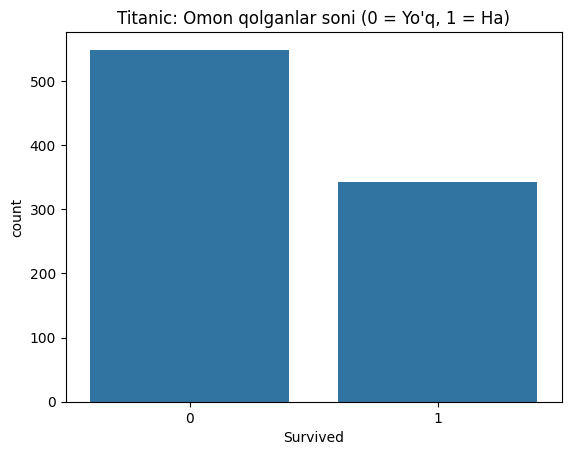

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Omon qolganlar soni
sns.countplot(x="Survived", data=df)
plt.title("Titanic: Omon qolganlar soni (0 = Yo'q, 1 = Ha)")
plt.show()


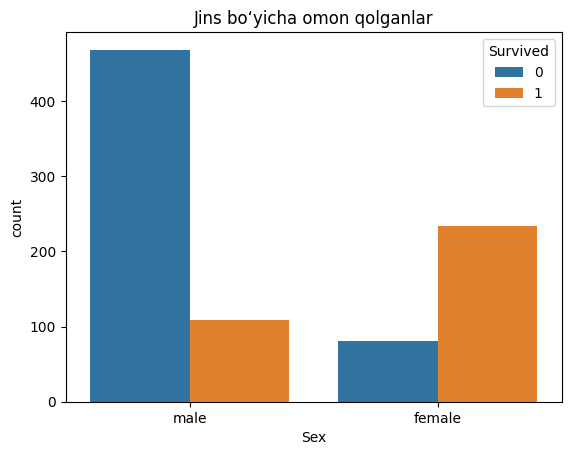

In [11]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Jins bo‘yicha omon qolganlar")
plt.show()


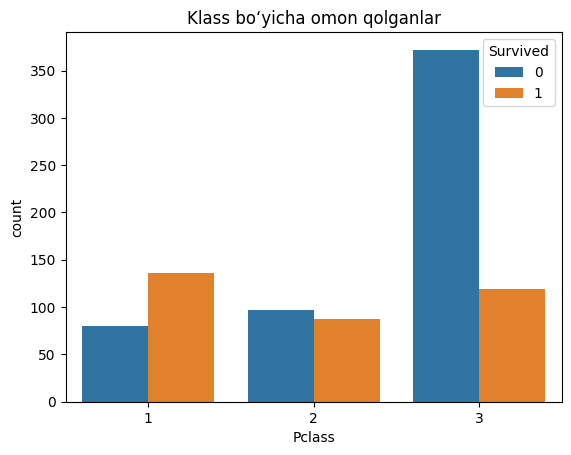

In [12]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Klass bo‘yicha omon qolganlar")
plt.show()


In [13]:
# Kategorik ustunlarni raqamga aylantiramiz
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Keraksiz ustunlarni olib tashlaymiz
df = df.drop(["Name", "Ticket", "PassengerId"], axis=1)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)  # Kiruvchi ustunlar
y = df["Survived"]                # Chiqish ustuni

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# To'g'rilik foizi
accuracy = accuracy_score(y_test, y_pred)
print("Model aniqligi:", round(accuracy * 100, 2), "%")


Model aniqligi: 79.89 %


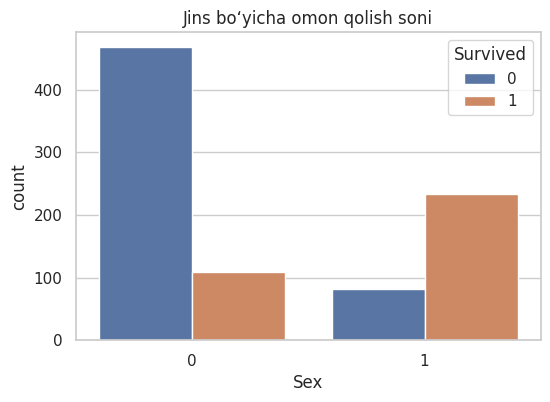

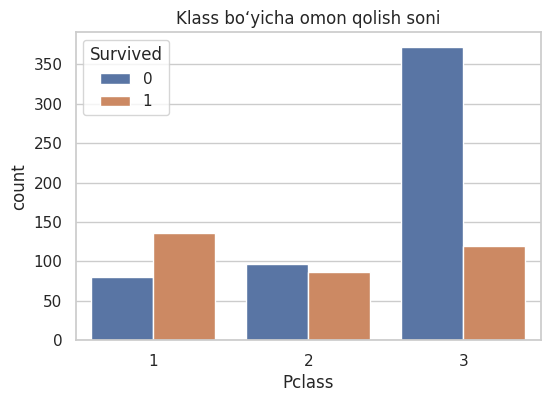

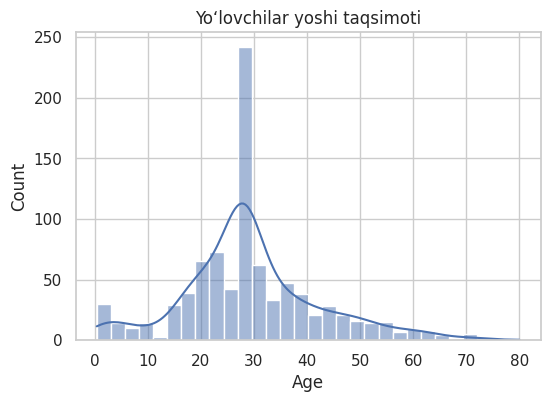

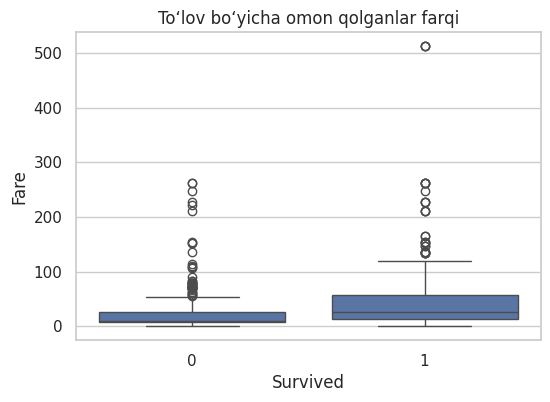

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafika uchun sozlamalar
sns.set(style="whitegrid")

# 1. Jins bo‘yicha omon qolish
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Jins bo‘yicha omon qolish soni")
plt.show()

# 2. Klass bo‘yicha omon qolish
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Klass bo‘yicha omon qolish soni")
plt.show()

# 3. Yosh taqsimoti
plt.figure(figsize=(6,4))
sns.histplot(df["Age"].dropna(), kde=True, bins=30)
plt.title("Yo‘lovchilar yoshi taqsimoti")
plt.show()

# 4. To‘lov bo‘yicha omon qolish
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("To‘lov bo‘yicha omon qolganlar farqi")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest aniqligi: {rf_acc * 100:.2f} %")


Random Forest aniqligi: 82.68 %


In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost aniqligi: {xgb_acc * 100:.2f} %")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:41:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost aniqligi: 80.45 %


In [22]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Eng yaxshi parametrlar:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)
print(f"Optimallashgan Random Forest aniqligi: {best_acc * 100:.2f} %")


Eng yaxshi parametrlar: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Optimallashgan Random Forest aniqligi: 81.01 %
